<img src="img\pandas.png">

# Pandas入门

                ——Meu培训之Pandas入门|小子令狐冲出品

本文主要是为Pandas新人介绍此库的基本用法，详细了解可登陆pandas库官网：http://pandas.pydata.org/
推荐本人博客http://blog.csdn.net/zheng_weibin

通常，我们以下面的方式引入pandas库以及相关的库

In [118]:
import pandas as pd

from pandas import Series,DataFrame

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## 创建pandas对象 

通过列表创建一个Series，pandas会自动建立默认的整数索引

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy创建一个DataFrame，并且使用日期作为index，自定义标签作为columns

In [4]:
#首先创建一个日期索引
dates = pd.date_range('20180215',periods = 7)
dates

DatetimeIndex(['2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20', '2018-02-21'],
              dtype='datetime64[ns]', freq='D')

In [5]:
#利用numpy的random.randn建立随机数，再重塑为7行4列的矩阵
df = DataFrame(np.random.randn(28).reshape(7,4),index = dates,columns = list('ABCD'))
df

,A,B,C,D
2018-02-15,2.913403,1.264066,-0.488556,0.882841
2018-02-16,-0.955509,0.354686,2.882408,0.163711
2018-02-17,-0.315675,1.039003,0.856088,1.641377
2018-02-18,0.089160,-0.175217,0.423269,1.398370
2018-02-19,0.152923,-0.111456,-2.336772,0.092884
2018-02-20,0.892104,1.213573,0.303651,-1.326205
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219


通过字典创建DataFrame，键作为列名，值作为每一列的单元格的值，如果传入值是标量就会进行广播。pandas与list一大不同就是，list中每个元素的类型都可以不一样，但是pandas每一列的数据类型需要一直（允许不一致，但读写及预算速度会大大下降，而且会因类型不一无法执行运算）

In [6]:
df2 = DataFrame({
    'A':1.,
    'B':pd.Timestamp('20130102'),
    'C':pd.Series(1,index=list(range(4)),dtype='float32'),
    'D':'foo'
})
df2

,A,B,C,D
0,1.0,2013-01-02,1.0,foo
1,1.0,2013-01-02,1.0,foo
2,1.0,2013-01-02,1.0,foo
3,1.0,2013-01-02,1.0,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D            object
dtype: object

## 浏览数据

从数据的头部或者尾部查看部分数据

In [8]:
df.head()

,A,B,C,D
2018-02-15,2.913403,1.264066,-0.488556,0.882841
2018-02-16,-0.955509,0.354686,2.882408,0.163711
2018-02-17,-0.315675,1.039003,0.856088,1.641377
2018-02-18,0.089160,-0.175217,0.423269,1.398370
2018-02-19,0.152923,-0.111456,-2.336772,0.092884


In [9]:
df.tail(2)

,A,B,C,D
2018-02-20,0.892104,1.213573,0.303651,-1.326205
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219


查看数据的index和columns,以及底层numpy数组

In [10]:
df.index

DatetimeIndex(['2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20', '2018-02-21'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 2.91340311,  1.26406611, -0.48855628,  0.88284125],
       [-0.9555094 ,  0.35468574,  2.88240762,  0.16371061],
       [-0.3156747 ,  1.03900283,  0.85608782,  1.64137665],
       [ 0.08915988, -0.17521738,  0.42326917,  1.39837003],
       [ 0.15292316, -0.11145648, -2.33677179,  0.09288436],
       [ 0.89210416,  1.2135734 ,  0.3036509 , -1.32620511],
       [-0.19694642, -0.88236102, -0.23149595, -0.1212187 ]])

用统计学指标快速描述数据的概要

In [13]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.368494,0.386042,0.201227,0.390251
std,1.252732,0.822034,1.569599,1.014218
min,-0.955509,-0.882361,-2.336772,-1.326205
25%,-0.256311,-0.143337,-0.360026,-0.014167
50%,0.089160,0.354686,0.303651,0.163711
75%,0.522514,1.126288,0.639678,1.140606
max,2.913403,1.264066,2.882408,1.641377


转置数据

In [14]:
df.T

,2018-02-15 00:00:00,2018-02-16 00:00:00,2018-02-17 00:00:00,2018-02-18 00:00:00,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00
A,2.913403,-0.955509,-0.315675,0.089160,0.152923,0.892104,-0.196946
B,1.264066,0.354686,1.039003,-0.175217,-0.111456,1.213573,-0.882361
C,-0.488556,2.882408,0.856088,0.423269,-2.336772,0.303651,-0.231496
D,0.882841,0.163711,1.641377,1.398370,0.092884,-1.326205,-0.121219


排序：按照轴排序或按照值排序

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2018-02-15,0.882841,-0.488556,1.264066,2.913403
2018-02-16,0.163711,2.882408,0.354686,-0.955509
2018-02-17,1.641377,0.856088,1.039003,-0.315675
2018-02-18,1.398370,0.423269,-0.175217,0.089160
2018-02-19,0.092884,-2.336772,-0.111456,0.152923
2018-02-20,-1.326205,0.303651,1.213573,0.892104
2018-02-21,-0.121219,-0.231496,-0.882361,-0.196946


In [16]:
df.sort_values(by='B')

,A,B,C,D
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219
2018-02-18,0.089160,-0.175217,0.423269,1.398370
2018-02-19,0.152923,-0.111456,-2.336772,0.092884
2018-02-16,-0.955509,0.354686,2.882408,0.163711
2018-02-17,-0.315675,1.039003,0.856088,1.641377
2018-02-20,0.892104,1.213573,0.303651,-1.326205
2018-02-15,2.913403,1.264066,-0.488556,0.882841


## 数据筛选

### 简单数据选择

选择一个列，得到结果是一个Series,等价于df.A

In [17]:
df['A']

2018-02-15    2.913403
2018-02-16   -0.955509
2018-02-17   -0.315675
2018-02-18    0.089160
2018-02-19    0.152923
2018-02-20    0.892104
2018-02-21   -0.196946
Freq: D, Name: A, dtype: float64

对行进行切片选择

In [18]:
df[0:3]

,A,B,C,D
2018-02-15,2.913403,1.264066,-0.488556,0.882841
2018-02-16,-0.955509,0.354686,2.882408,0.163711
2018-02-17,-0.315675,1.039003,0.856088,1.641377


In [19]:
df['20180216':'20180220']

,A,B,C,D
2018-02-16,-0.955509,0.354686,2.882408,0.163711
2018-02-17,-0.315675,1.039003,0.856088,1.641377
2018-02-18,0.089160,-0.175217,0.423269,1.398370
2018-02-19,0.152923,-0.111456,-2.336772,0.092884
2018-02-20,0.892104,1.213573,0.303651,-1.326205


### 通过标签进行索引

In [20]:
#使用标签得到数据的截面
df.loc[dates[0]]

A    2.913403
B    1.264066
C   -0.488556
D    0.882841
Name: 2018-02-15 00:00:00, dtype: float64

In [21]:
#多轴索引,即index，columns
df.loc[:,['A','C']]

,A,C
2018-02-15,2.913403,-0.488556
2018-02-16,-0.955509,2.882408
2018-02-17,-0.315675,0.856088
2018-02-18,0.089160,0.423269
2018-02-19,0.152923,-2.336772
2018-02-20,0.892104,0.303651
2018-02-21,-0.196946,-0.231496


In [22]:
#通过索引降低了数据的维度,把二维数组DataFrame改为一维数组Series
df.loc['20180216',['A','B']]

A   -0.955509
B    0.354686
Name: 2018-02-16 00:00:00, dtype: float64

In [23]:
#通过索引得到一个标量值
df.loc['20180216','A']

-0.95550940323425937

## 通过位置进行筛选

In [24]:
#通过传入整数进行索引
df.iloc[3]

A    0.089160
B   -0.175217
C    0.423269
D    1.398370
Name: 2018-02-18 00:00:00, dtype: float64

In [25]:
#通过传入整数切片，类似python列表索引
df.iloc[2:5,:2]

,A,B
2018-02-17,-0.315675,1.039003
2018-02-18,0.089160,-0.175217
2018-02-19,0.152923,-0.111456


In [26]:
#通过传入整数列表代表位置进行索引，类似python列表
df.iloc[[2,3,5],[2,3]]

,C,D
2018-02-17,0.856088,1.641377
2018-02-18,0.423269,1.398370
2018-02-20,0.303651,-1.326205


## 布尔索引

通过单列来筛选数据

In [27]:
df[df.B>0]

,A,B,C,D
2018-02-15,2.913403,1.264066,-0.488556,0.882841
2018-02-16,-0.955509,0.354686,2.882408,0.163711
2018-02-17,-0.315675,1.039003,0.856088,1.641377
2018-02-20,0.892104,1.213573,0.303651,-1.326205


通过整个表格来筛选数据

In [28]:
#首先通过df>0生成一个布尔矩阵，通过布尔索引筛选数据
df[df>0]

,A,B,C,D
2018-02-15,2.913403,1.264066,NaN,0.882841
2018-02-16,NaN,0.354686,2.882408,0.163711
2018-02-17,NaN,1.039003,0.856088,1.641377
2018-02-18,0.089160,NaN,0.423269,1.398370
2018-02-19,0.152923,NaN,NaN,0.092884
2018-02-20,0.892104,1.213573,0.303651,NaN
2018-02-21,NaN,NaN,NaN,NaN


通过isin函数过滤数据

In [29]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three','two']
df2

,A,B,C,D,E
2018-02-15,2.913403,1.264066,-0.488556,0.882841,one
2018-02-16,-0.955509,0.354686,2.882408,0.163711,one
2018-02-17,-0.315675,1.039003,0.856088,1.641377,two
2018-02-18,0.089160,-0.175217,0.423269,1.398370,three
2018-02-19,0.152923,-0.111456,-2.336772,0.092884,four
2018-02-20,0.892104,1.213573,0.303651,-1.326205,three
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,two


In [30]:
#isin函数相当于关系判断函数in的矩阵上的变形
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2018-02-17,-0.315675,1.039003,0.856088,1.641377,two
2018-02-19,0.152923,-0.111456,-2.336772,0.092884,four
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,two


## 数据的新增和修改

增加一个新列

In [31]:
#先创建一个Series，再把Series加到DataFrame上
s1 = pd.Series([1,2,3,4,5,6,7], index=pd.date_range('20180215', periods=7))
s1

2018-02-15    1
2018-02-16    2
2018-02-17    3
2018-02-18    4
2018-02-19    5
2018-02-20    6
2018-02-21    7
Freq: D, dtype: int64

In [32]:
df['F']=s1
df

,A,B,C,D,F
2018-02-15,2.913403,1.264066,-0.488556,0.882841,1
2018-02-16,-0.955509,0.354686,2.882408,0.163711,2
2018-02-17,-0.315675,1.039003,0.856088,1.641377,3
2018-02-18,0.089160,-0.175217,0.423269,1.398370,4
2018-02-19,0.152923,-0.111456,-2.336772,0.092884,5
2018-02-20,0.892104,1.213573,0.303651,-1.326205,6
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,7


In [33]:
df['E']=df.mean(axis=1)
df

,A,B,C,D,F,E
2018-02-15,2.913403,1.264066,-0.488556,0.882841,1,1.114351
2018-02-16,-0.955509,0.354686,2.882408,0.163711,2,0.889059
2018-02-17,-0.315675,1.039003,0.856088,1.641377,3,1.244159
2018-02-18,0.089160,-0.175217,0.423269,1.398370,4,1.147116
2018-02-19,0.152923,-0.111456,-2.336772,0.092884,5,0.559516
2018-02-20,0.892104,1.213573,0.303651,-1.326205,6,1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,7,1.113596


修改DataFrame数据

In [34]:
df.loc['2018-02-19','B']=0.
df.iloc[2,2]=99.
df

,A,B,C,D,F,E
2018-02-15,2.913403,1.264066,-0.488556,0.882841,1,1.114351
2018-02-16,-0.955509,0.354686,2.882408,0.163711,2,0.889059
2018-02-17,-0.315675,1.039003,99.000000,1.641377,3,1.244159
2018-02-18,0.089160,-0.175217,0.423269,1.398370,4,1.147116
2018-02-19,0.152923,0.000000,-2.336772,0.092884,5,0.559516
2018-02-20,0.892104,1.213573,0.303651,-1.326205,6,1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,7,1.113596


In [35]:
df[df>0]=-df
df

,A,B,C,D,F,E
2018-02-15,-2.913403,-1.264066,-0.488556,-0.882841,-1,-1.114351
2018-02-16,-0.955509,-0.354686,-2.882408,-0.163711,-2,-0.889059
2018-02-17,-0.315675,-1.039003,-99.000000,-1.641377,-3,-1.244159
2018-02-18,-0.089160,-0.175217,-0.423269,-1.398370,-4,-1.147116
2018-02-19,-0.152923,0.000000,-2.336772,-0.092884,-5,-0.559516
2018-02-20,-0.892104,-1.213573,-0.303651,-1.326205,-6,-1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,-7,-1.113596


## 缺失值处理

pandas使用np.nan作为缺失值的表示方式

In [36]:
#制造缺失值
df1=df.copy()
df1.iloc[4,4]=df1.iloc[2:4,[2,5]]=np.nan
df1

,A,B,C,D,F,E
2018-02-15,-2.913403,-1.264066,-0.488556,-0.882841,-1.0,-1.114351
2018-02-16,-0.955509,-0.354686,-2.882408,-0.163711,-2.0,-0.889059
2018-02-17,-0.315675,-1.039003,NaN,-1.641377,-3.0,NaN
2018-02-18,-0.089160,-0.175217,NaN,-1.398370,-4.0,NaN
2018-02-19,-0.152923,0.000000,-2.336772,-0.092884,NaN,-0.559516
2018-02-20,-0.892104,-1.213573,-0.303651,-1.326205,-6.0,-1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,-7.0,-1.113596


### 删除缺失值

In [37]:
df1.dropna()
#默认参数how=any，即一行中任意一列为na值就删除该列，how还有一个值为all。
#该操作会产生一个copy，如果需要再原地修改，需要修改参数inplace=True

,A,B,C,D,F,E
2018-02-15,-2.913403,-1.264066,-0.488556,-0.882841,-1.0,-1.114351
2018-02-16,-0.955509,-0.354686,-2.882408,-0.163711,-2.0,-0.889059
2018-02-20,-0.892104,-1.213573,-0.303651,-1.326205,-6.0,-1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,-7.0,-1.113596


### 填充缺失值

In [38]:
df1.fillna(value=5)#用常量填充缺失值

,A,B,C,D,F,E
2018-02-15,-2.913403,-1.264066,-0.488556,-0.882841,-1.0,-1.114351
2018-02-16,-0.955509,-0.354686,-2.882408,-0.163711,-2.0,-0.889059
2018-02-17,-0.315675,-1.039003,5.000000,-1.641377,-3.0,5.000000
2018-02-18,-0.089160,-0.175217,5.000000,-1.398370,-4.0,5.000000
2018-02-19,-0.152923,0.000000,-2.336772,-0.092884,5.0,-0.559516
2018-02-20,-0.892104,-1.213573,-0.303651,-1.326205,-6.0,-1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,-7.0,-1.113596


In [39]:
df1.fillna(df1.mean(axis=0))#用计算结果填充缺失值

,A,B,C,D,F,E
2018-02-15,-2.913403,-1.264066,-0.488556,-0.882841,-1.000000,-1.114351
2018-02-16,-0.955509,-0.354686,-2.882408,-0.163711,-2.000000,-0.889059
2018-02-17,-0.315675,-1.039003,-1.248577,-1.641377,-3.000000,-1.018629
2018-02-18,-0.089160,-0.175217,-1.248577,-1.398370,-4.000000,-1.018629
2018-02-19,-0.152923,0.000000,-2.336772,-0.092884,-3.833333,-0.559516
2018-02-20,-0.892104,-1.213573,-0.303651,-1.326205,-6.000000,-1.416625
2018-02-21,-0.196946,-0.882361,-0.231496,-0.121219,-7.000000,-1.113596


## 数据运算、处理

### 统计

In [40]:
df.mean()#均值计算

A    -0.787960
B    -0.704129
C   -15.095165
D    -0.803801
F    -4.000000
E    -1.069203
dtype: float64

In [41]:
df.mean(1)#按行计算均值

2018-02-15    -1.277203
2018-02-16    -1.207562
2018-02-17   -17.706702
2018-02-18    -1.205522
2018-02-19    -1.357016
2018-02-20    -1.858693
2018-02-21    -1.590936
Freq: D, dtype: float64

### Apply

对数据应用函数

In [42]:
df.apply(np.cumsum)

,A,B,C,D,F,E
2018-02-15,-2.913403,-1.264066,-0.488556,-0.882841,-1,-1.114351
2018-02-16,-3.868913,-1.618752,-3.370964,-1.046552,-3,-2.003410
2018-02-17,-4.184587,-2.657755,-102.370964,-2.687929,-6,-3.247568
2018-02-18,-4.273747,-2.832972,-102.794233,-4.086299,-10,-4.394685
2018-02-19,-4.426670,-2.832972,-105.131005,-4.179183,-15,-4.954200
2018-02-20,-5.318774,-4.046545,-105.434656,-5.505388,-21,-6.370825
2018-02-21,-5.515721,-4.928906,-105.666152,-5.626607,-28,-7.484421


In [43]:
df.apply(lambda x: x.max() - x.min())

A     2.824243
B     1.264066
C    98.768504
D     1.548492
F     6.000000
E     0.857109
dtype: float64

### 直方图

In [44]:
s = Series(np.random.randint(0, 7, size=10))
s

0    6
1    6
2    5
3    4
4    0
5    0
6    4
7    5
8    1
9    0
dtype: int32

In [45]:
s.value_counts()

0    3
6    2
5    2
4    2
1    1
dtype: int64

### 字符串处理

pandas提供了一系列字符串处理函数，非常容易就可以处理数组中每一个元素的字符串

In [46]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据连接

### 数据拼接Concat

In [47]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.658916,0.294546,-1.074913,-0.141263
1,1.354879,-0.610863,0.673031,-0.609426
2,-1.057293,-1.916487,0.568778,0.286404
3,-0.025194,-0.695985,-1.670892,-1.415173
4,-1.559254,0.390683,0.895639,-0.004359
5,-0.057909,0.072601,-0.758099,-0.352503
6,0.146260,0.030984,0.856312,0.356471
7,0.259896,1.745335,0.944691,1.941083
8,-0.560974,-0.442620,-0.590010,1.050855
9,1.430191,0.353182,0.387037,0.706468


In [48]:
#先把df切成三块
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.658916,0.294546,-1.074913,-0.141263
1,1.354879,-0.610863,0.673031,-0.609426
2,-1.057293,-1.916487,0.568778,0.286404
3,-0.025194,-0.695985,-1.670892,-1.415173
4,-1.559254,0.390683,0.895639,-0.004359
5,-0.057909,0.072601,-0.758099,-0.352503
6,0.146260,0.030984,0.856312,0.356471
7,0.259896,1.745335,0.944691,1.941083
8,-0.560974,-0.442620,-0.590010,1.050855
9,1.430191,0.353182,0.387037,0.706468


### SQL风格的连接

In [49]:
left = pd.DataFrame({'key': ['a', 'a'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['a', 'a'], 'rval': [4, 5]})

In [50]:
left

,key,lval
0,a,1
1,a,2


In [51]:
right

,key,rval
0,a,4
1,a,5


In [52]:
pd.merge(left, right, on='key')

,key,lval,rval
0,a,1,4
1,a,1,5
2,a,2,4
3,a,2,5


In [53]:
left = pd.DataFrame({'key': ['a', 'b'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['a', 'b'], 'rval': [4, 5]})
left

,key,lval
0,a,1
1,b,2


In [54]:
right

,key,rval
0,a,4
1,b,5


In [55]:
pd.merge(left, right, on='key')

,key,lval,rval
0,a,1,4
1,b,2,5


## 分组计算Grouping

分组运算是一个“split-apply-combine”的过程：
* 拆分，pandas对象中的数据会根据你所提供的一个或多个键被拆分为多组
* 应用，将一个函数应用到各个分组并产生一个新值
* 合并，所有这些函数的执行结果会合并到最终的结果对象中

<img src="img\groupby.jpg">

In [96]:
df = pd.DataFrame({'A' : ['gz', 'sz', 'gz', 'sz','gz', 'sz', 'gz', 'gz'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C':['a','b','c','c','a','a','c','b'],
                   'D' : np.random.randn(8),
                   'E' : np.random.randn(8)})
df

,A,B,C,D,E
0,gz,one,a,-1.376417,0.022855
1,sz,one,b,-1.172765,-0.785078
2,gz,two,c,0.604324,-1.530379
3,sz,three,c,-0.248465,-0.026068
4,gz,two,a,-1.988219,0.689505
5,sz,two,a,-0.873449,1.031414
6,gz,one,c,0.393585,1.028130
7,gz,three,b,0.959255,0.435403


In [97]:
df.groupby(['A','B']).sum()

D         E
A  B                        
gz one   -0.982832  1.050985
   three  0.959255  0.435403
   two   -1.383895 -0.840874
sz one   -1.172765 -0.785078
   three -0.248465 -0.026068
   two   -0.873449  1.031414

## 重塑

### 透视表Pivot_table

In [98]:
df

,A,B,C,D,E
0,gz,one,a,-1.376417,0.022855
1,sz,one,b,-1.172765,-0.785078
2,gz,two,c,0.604324,-1.530379
3,sz,three,c,-0.248465,-0.026068
4,gz,two,a,-1.988219,0.689505
5,sz,two,a,-0.873449,1.031414
6,gz,one,c,0.393585,1.028130
7,gz,three,b,0.959255,0.435403


In [83]:
pt = pd.pivot_table(df, values='D', index=['A'], columns=['B'])
pt

B,one,three,two
A,,,
gz,-0.704620,1.922807,-0.356847
sz,-2.428166,-0.000530,-0.651132


In [114]:
pt.stack()#stack简单的来说就是逆透视了

A   B    
gz  one     -0.704620
    three    1.922807
    two     -0.356847
sz  one     -2.428166
    three   -0.000530
    two     -0.651132
dtype: float64

## 画图

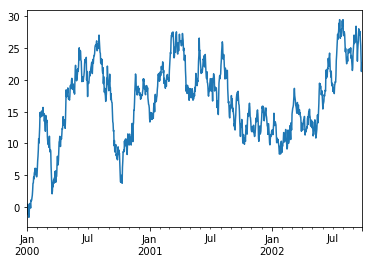

In [119]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

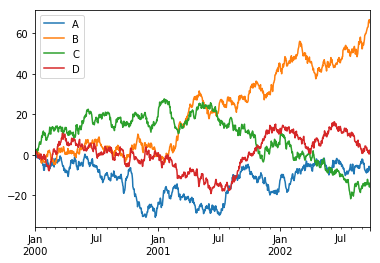

In [122]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

## 文件读入和输出

### 文本文件使用read_csv

In [128]:
df.to_csv('foo.csv')

In [129]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.970187,0.365839,0.492554,0.959344
1,2000-01-02,1.065424,0.882345,1.131123,1.575585
2,2000-01-03,0.280785,1.523568,2.262536,1.402659
3,2000-01-04,-0.771897,1.086271,2.686976,1.797990
4,2000-01-05,0.110011,0.415428,1.189021,1.088607
5,2000-01-06,-1.382718,0.372974,1.101641,0.741063
6,2000-01-07,-0.264643,1.320725,1.723528,-0.009023
7,2000-01-08,-0.715202,0.634724,2.993974,-1.325359
8,2000-01-09,-1.434563,1.373804,2.324990,-0.647596
9,2000-01-10,-1.428389,0.097310,3.458704,-1.401916


### Excel文件使用read_excel与to_excel

In [134]:
pd.read_excel('data\p01.xlsx', sheet_name='Jan')

,nm,sc
0,a,49
1,b,76
2,c,15
3,d,13
4,e,49
5,f,43
6,g,64
7,h,4
8,i,71
9,j,87


<img src="img\logo.jpg" style="width:100px;height:100px;float:right">